In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic data for clustering
features, true_labels = make_blobs(
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42
)

In [3]:
# Data preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Clustering data into 3 clusters in 10 iterations
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [6]:
kmeans.inertia_

74.57960106819856

c'est la somme des distances au carré entre chaque point de données et le centre de son cluster le plus proche et elle dépend du nombre de clusters.

In [7]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

ce sont les centres des clusters trouvés par l'algorithme. 

In [9]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

ces étiquettes signifient que le premier point appartient au cluster 0, le second au cluster 1, et les trois suivants au cluster 2.

In [10]:
# Elbow method
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

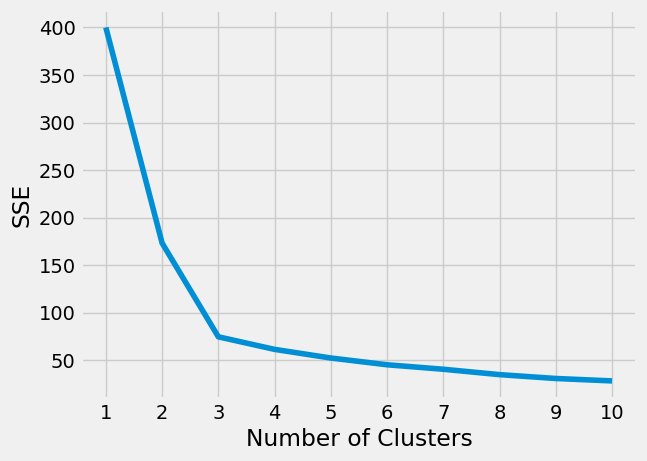

In [12]:
# SSE plot for each k
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
kl = KneeLocator( range(1, 11), sse, curve="convex",
direction="decreasing")
kl.elbow

np.int64(3)

comme on l'a prédifinit, la meilleure valeur de k est 3.

In [ ]:
# Silhouette score, higher is better
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

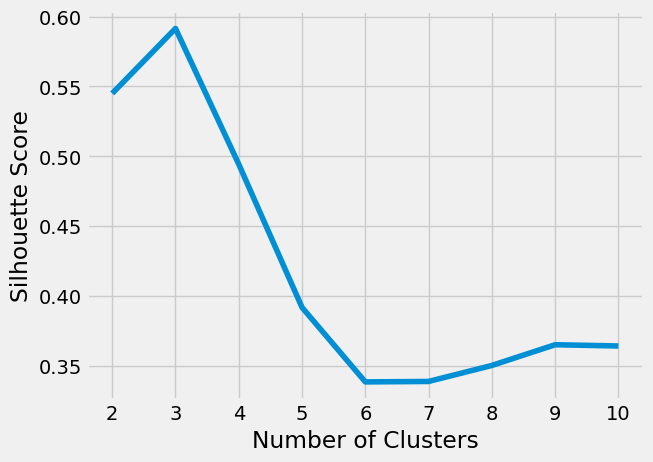

In [15]:
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()